In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cryptocurrency Dataset Features
```
date : time of observation
price: price at observation point
market_cap : market capitalization in USD
total_volume : volume of transactions on the given day
```
(from https://www.coingecko.com/en/coins/dogecoin/historical_data/btc and https://www.coingecko.com/en/coins/bitcoin/historical_data/usd#panel)

## Bitcoin Dataset

In [2]:
BTC = pd.read_csv (r'btc-usd-max.csv')
BTC.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [3]:
# view range of bitcoin data
BTC.tail()

,snapped_at,price,market_cap,total_volume
2953,2021-05-31 00:00:00 UTC,35714.752020,6.686643e+11,3.065027e+10
2954,2021-06-01 00:00:00 UTC,37340.679266,6.991386e+11,3.795080e+10
2955,2021-06-02 00:00:00 UTC,36680.068202,6.887264e+11,3.353691e+10
2956,2021-06-03 00:00:00 UTC,37685.717982,7.045313e+11,3.124069e+10
2957,2021-06-04 00:00:00 UTC,39151.316184,7.331507e+11,3.339672e+10


In [4]:
# rename snapped_at to date
BTC = BTC.rename(columns={'snapped_at':'date'})
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [5]:
# strip string in snapped_at to remove time
BTC['date'] = BTC['date'].str.split(' ', expand=True)[0]
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28,135.30,1.500518e+09,0.0
1,2013-04-29,141.96,1.575032e+09,0.0
2,2013-04-30,135.30,1.501657e+09,0.0
3,2013-05-01,117.00,1.298952e+09,0.0
4,2013-05-02,103.43,1.148668e+09,0.0


Text(0.5, 1.0, 'Bitcoin Price over Time')

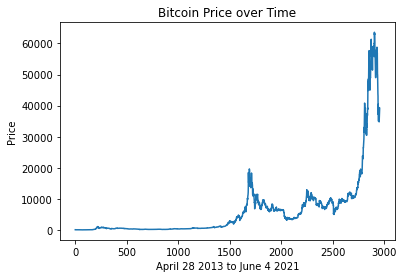

In [6]:
# using indices as dates
x =BTC.index
b_price=BTC.price
x_label = 'April 28 2013 to June 4 2021'

plt.plot(x, b_price)
plt.xlabel(x_label)
plt.ylabel('Price')
plt.title('Bitcoin Price over Time')

Text(0.5, 1.0, 'Bitcoin Market Cap over Time')

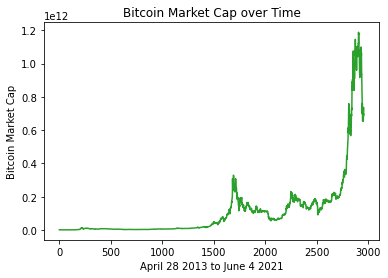

In [129]:
b_cap= BTC.market_cap

plt.plot(x, b_cap, 'tab:green')
plt.xlabel(x_label)
plt.ylabel('Bitcoin Market Cap')
plt.title('Bitcoin Market Cap over Time')

Text(0.5, 1.0, 'Bitcoin Total Volume over Time')

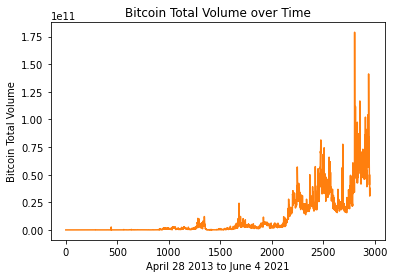

In [130]:
b_volume = BTC.total_volume

plt.plot(x, b_volume, 'tab:orange')
plt.xlabel(x_label)
plt.ylabel('Bitcoin Total Volume')
plt.title('Bitcoin Total Volume over Time')

## Doge Dataset

In [9]:
DOGE = pd.read_csv (r'doge-usd-max.csv')
DOGE.head()

,snapped_at,price,market_cap,total_volume
0,2013-12-15 00:00:00 UTC,0.000559,3488670.0,0.0
1,2013-12-17 00:00:00 UTC,0.000218,1619159.0,0.0
2,2013-12-18 00:00:00 UTC,0.000268,2191987.0,0.0
3,2013-12-19 00:00:00 UTC,0.000475,4299422.0,0.0
4,2013-12-20 00:00:00 UTC,0.000989,9866232.0,0.0


In [10]:
# rename snapped_at to date
DOGE = DOGE.rename(columns={'snapped_at':'date'})
# strip string in snapped_at to remove time
DOGE['date'] = DOGE['date'].str.split(' ', expand=True)[0]
DOGE.head()

,date,price,market_cap,total_volume
0,2013-12-15,0.000559,3488670.0,0.0
1,2013-12-17,0.000218,1619159.0,0.0
2,2013-12-18,0.000268,2191987.0,0.0
3,2013-12-19,0.000475,4299422.0,0.0
4,2013-12-20,0.000989,9866232.0,0.0


In [43]:
DOGE.tail()

,date,price,market_cap,total_volume
2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


Text(0.5, 1.0, 'DOGE Price over Time')

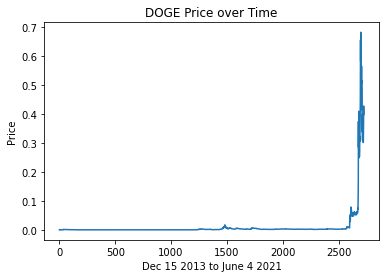

In [44]:
# using indices in replace of dates
x2=DOGE.index
x2_label = 'Dec 15 2013 to June 4 2021'

plt.plot(x2,DOGE.price)
plt.xlabel(x2_label)
plt.ylabel('Price')
plt.title('DOGE Price over Time')

#### since there hasn't been much fluctuation in Doge for the first 2500 observation points, we can just plot graph when price is >= 0.01


In [124]:
doge = DOGE.iloc[2609:,:]
doge

,date,price,market_cap,total_volume
2609,2021-02-08,0.079085,1.027107e+10,1.379313e+10
2610,2021-02-09,0.079227,1.016402e+10,1.082381e+10
2611,2021-02-10,0.069977,8.978311e+09,6.181135e+09
2612,2021-02-11,0.072987,9.381046e+09,6.304019e+09
2613,2021-02-12,0.069755,8.951729e+09,3.377206e+09
...,...,...,...,...
2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10


In [125]:
start = doge.date.iloc[0]
end = doge.date.iloc[-1]

In [111]:
doge.tail()

,date,price,market_cap,total_volume
2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


Text(0.5, 1.0, 'DOGE Price over Time')

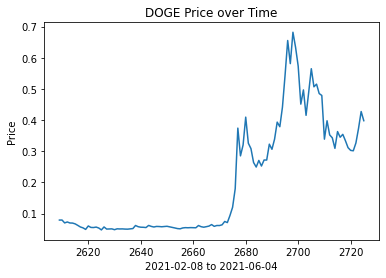

In [126]:
doge_x2 = doge.index
d_price =doge.price

x2_label = start + ' to ' + end
plt.plot(doge_x2, d_price)
plt.xlabel(x2_label)
plt.ylabel('Price')
plt.title('DOGE Price over Time')

Text(0.5, 1.0, 'DOGE Market Cap over Time')

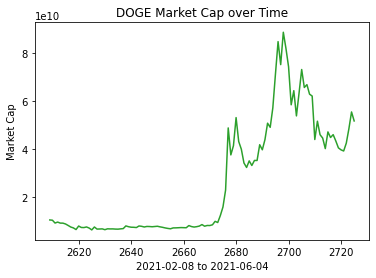

In [128]:
d_cap =doge.market_cap

plt.plot(doge_x2, d_cap, 'tab:green')
plt.xlabel(x2_label)
plt.ylabel('Market Cap')
plt.title('DOGE Market Cap over Time')

Text(0.5, 1.0, 'DOGE Total Volume over Time')

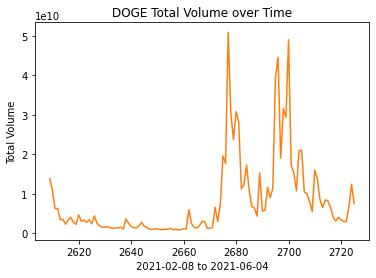

In [127]:
d_volume =doge.total_volume

plt.plot(doge_x2, d_volume,'tab:orange')
plt.xlabel(x2_label)
plt.ylabel('Total Volume')
plt.title('DOGE Total Volume over Time')

# Model Selection: Multiple Linear Regression
Goal: select the model with the lowest cross-validated test MSE (mean squared error) to balance bias/variance and prevent overfitting

> $CV_k = \frac{1}{k} \sum_{i=1}^{k} MSE_i$

## Leave-one-out cross-validation (LOOCV)
- Choose 1 data point to use for validation/test & train remaining (n-1) observations
- Repeat n times using a different observation point as the test each time

In [140]:

#use sklearn
from sklearn.model_selection import KFold
k = len(doge)-1

kf = KFold(n_splits = k, shuffle = True, random_state = 0)
# mse for baseline model with an intercept
mse_i = []
# mse for model in part g)
mse_g = []
# mse for model in part h)
mse_h = []
# mse for full model in part e)
mse_e = []

for train_i, val_i in kf.split(doge):
    print(train_i)
    # y value used to calculate MSE
    y = doge.price[val_i]
    
    
    # step 1: train model with baseline model
    model = ols(formula, data.iloc[train_i, :]).fit()
    
    # step 2: prediction
    yhat_i = model.predict(data.iloc[val_i, :])
    
    # step 3: append MSEs
    diffsq = (y-yhat_i)**2
    mse_i.append(np.mean(diffsq))
    
    
    # train model with best prediction in part g - feature 10
    formula_g = formula + " + " + data.columns[10]
    model_g = ols(formula_g, data.iloc[train_i, :]).fit()
    
    # predict and calculate MSE
    yhat_g = model_g.predict(data.iloc[val_i, :])
    diffsq = (y-yhat_g)**2
    mse_g.append(np.mean(diffsq))


[  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116]


KeyError: "None of [Int64Index([10, 59], dtype='int64')] are in the [index]"

In [132]:
for item in range(len(doge)):
    train_set= doge.price[:item]
    test_set = item

print (train_set)



2609    0.079085
2610    0.079227
2611    0.069977
2612    0.072987
2613    0.069755
          ...   
2720    0.302704
2721    0.301429
2722    0.326531
2723    0.373237
2724    0.427388
Name: price, Length: 116, dtype: float64


## k-Fold cross-validation
- Randomly assign each data point to one of k data subsets/folds
- Choose one fold as test set & train remaining (k-1) folds
- Same as LOOCV when k=n

# Model Estimation
* can get confidence intervals and show standard error bars